In [1]:
#Problem 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
warnings.filterwarnings('ignore')

In [2]:
df = pd.DataFrame(pd.read_csv('diabetes.csv'))
df.head()
y = df.pop('Outcome')
x = df.copy()

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = .8, test_size = .2)

In [4]:
scaler = StandardScaler()
x_Newtrain = scaler.fit_transform(x_train)
x_Newtest = scaler.fit_transform(x_test)

In [5]:
clf = LogisticRegression(solver='liblinear')
clf.fit(x_Newtrain,y_train)

predicted = clf.predict(x_Newtest)
matrix = confusion_matrix(y_test,predicted)
report = classification_report(y_test,predicted)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       101
           1       0.72      0.55      0.62        53

    accuracy                           0.77       154
   macro avg       0.76      0.72      0.73       154
weighted avg       0.77      0.77      0.76       154



Text(0.5, 257.44, 'Predicted label')

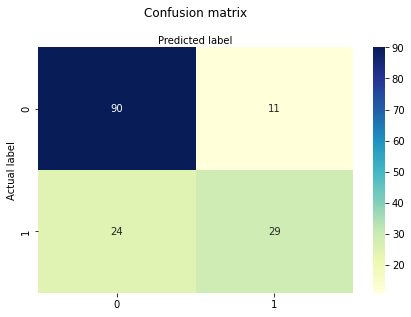

In [6]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu",fmt ='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')